In [2]:
import osmnx as ox
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [3]:
GSV_df = pd.read_csv('EDF_data.csv', skiprows=1)
GSV_df.head()

,Longitude,Latitude,NO Value,NO2 Value,BC Value
0,-122.322594,37.806781,23.390071,17.539762,0.818032
1,-122.322310,37.806150,19.700000,19.956750,0.551475
2,-122.322301,37.806420,23.611111,23.967768,0.593712
3,-122.322299,37.805880,15.714285,18.435184,0.489898
4,-122.322267,37.806689,27.108695,25.797037,0.739341


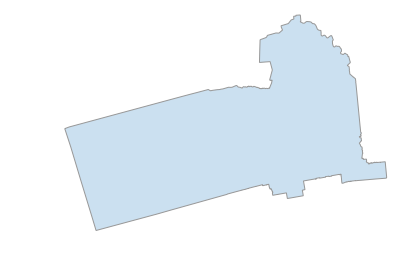

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1518f5f048>)

In [35]:
Oakland_poly = ox.gdf_from_place('Oakland, California')
Berkeley_poly = ox.gdf_from_place('Berkeley, California')
ElCerrito_poly = ox.gdf_from_place('El Cerrito, California')
Albany_poly = ox.gdf_from_place('Albany, California')
Alameda_poly = ox.gdf_from_place('Alameda, California')
ox.plot_shape(ox.project_gdf(Berkeley_poly))

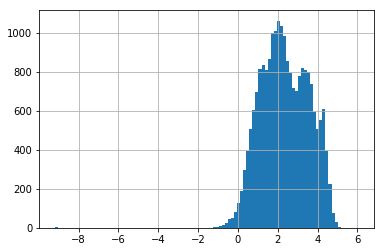

In [33]:
GSV_df['NO_log'] = np.log(GSV_df['NO Value'] + 0.0001)

GSV_df['NO_log'].hist(bins = 100);

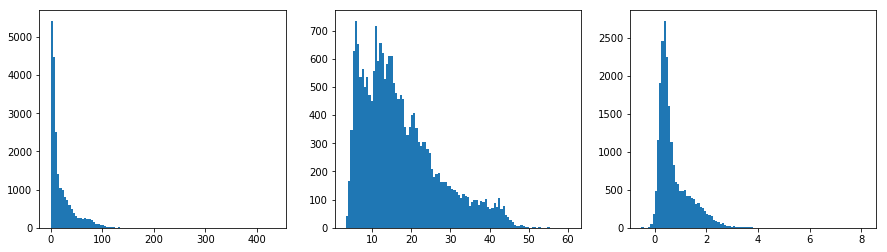

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].hist(GSV_df['NO Value'], bins=100)
ax[1].hist(GSV_df['NO2 Value'], bins=100)
ax[2].hist(GSV_df['BC Value'], bins=100);

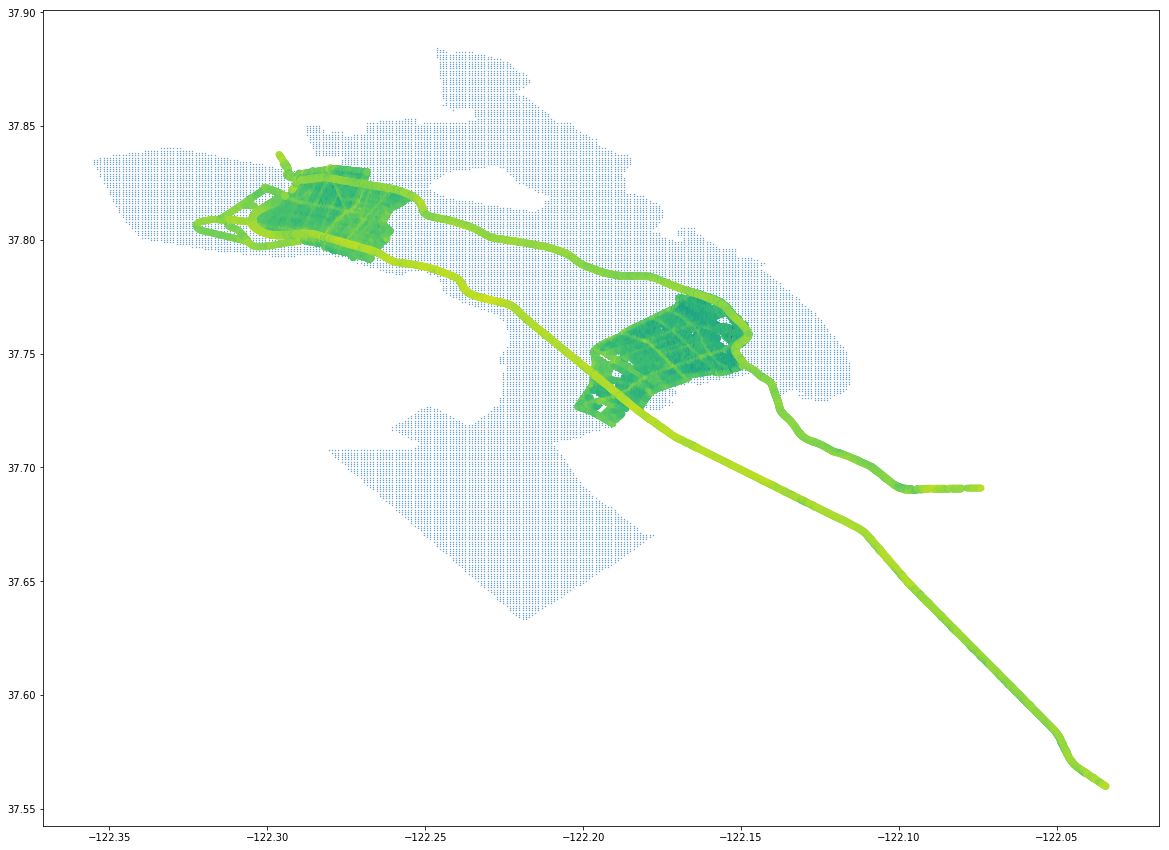

In [65]:
plt.figure(figsize=(20, 15))
plt.scatter(Berkeley_points.Long, Berkeley_points.Lat, s=0.1)
plt.scatter(GSV_df.Longitude, GSV_df.Latitude, c=GSV_df['NO_log'], cmap='viridis');

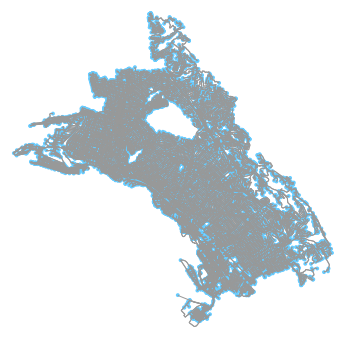

(<Figure size 555.105x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x151f201ef0>)

In [5]:
ox.plot_graph(ox.graph_from_place('Oakland, California'))

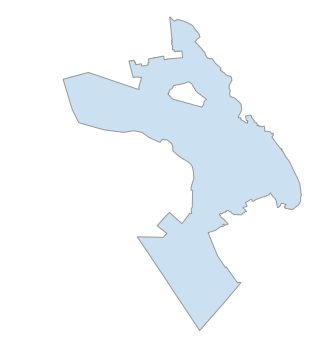

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x151e241438>)

In [70]:
Oakland_poly = ox.gdf_from_place('Oakland, California')
Berkeley_poly = ox.gdf_from_place('Berkeley, California')
ElCerrito_poly = ox.gdf_from_place('El Cerrito, California')
Albany_poly = ox.gdf_from_place('Albany, California')
Alameda_poly = ox.gdf_from_place('Alameda, California')
ox.plot_shape(ox.project_gdf(Oakland_poly))

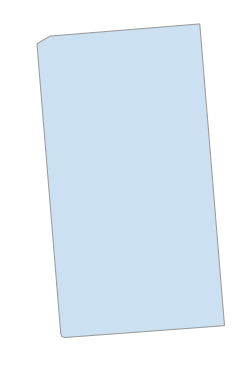

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1539c1dcc0>)

In [81]:
Oakland_poly = ox.gdf_from_place('Mission, San Francisco, California, USA')
ox.plot_shape(ox.project_gdf(Oakland_poly))

In [60]:
longs = np.linspace(Oakland_poly.bbox_east, Oakland_poly.bbox_west, 100)
lats = np.linspace(Oakland_poly.bbox_south, Oakland_poly.bbox_north, 50)

step = 0.0001 #close to 10m spacing in lat and long

for x in np.arange(Oakland_poly.bbox_east.values, Oakland_poly.bbox_west.values, step):
    print(x)

In [73]:
def create_latlon_grid(north, south, east, west):
    step = 0.001 #close to 100m spacing in lat and long (+/- 10m in Bay Area)
    lat_steps = int((north - south)/step)
    long_steps = int((east - west)/step)
    
    lats = np.linspace(south, north, num=lat_steps)
    longs = np.linspace(east, west, num=long_steps)
    
    LatLong_list = list(itertools.product(longs, lats))
    geometry = [Point(xy) for xy in zip(LatLong_list)] #shapely point
    
    gdf = gpd.GeoDataFrame(LatLong_list, geometry=geometry, columns = ['Long', 'Lat'])
    
    return(gdf)


Oakland_poly = ox.gdf_from_place('Oakland, California')

out = create_latlon_grid(Oakland_poly.bbox_north, Oakland_poly.bbox_south, 
                   Oakland_poly.bbox_east, Oakland_poly.bbox_west)

out

,Long,Lat,geometry
0,-122.114672,37.632226,POINT (-122.114672 37.632226)
1,-122.114672,37.633231,POINT (-122.114672 37.63323053174604)
2,-122.114672,37.634235,POINT (-122.114672 37.63423506349206)
3,-122.114672,37.635240,POINT (-122.114672 37.6352395952381)
4,-122.114672,37.636244,POINT (-122.114672 37.63624412698413)
5,-122.114672,37.637249,POINT (-122.114672 37.63724865873016)
6,-122.114672,37.638253,POINT (-122.114672 37.63825319047619)
7,-122.114672,37.639258,POINT (-122.114672 37.63925772222223)
8,-122.114672,37.640262,POINT (-122.114672 37.64026225396826)
9,-122.114672,37.641267,POINT (-122.114672 37.64126678571429)


/Users/samchamberlain/anaconda3/envs/OSMNX/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


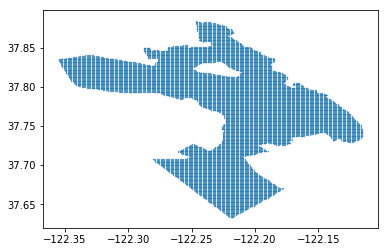

In [74]:
#try a spatial join
Berkeley_points = gpd.sjoin(out, Oakland_poly, how="inner", op="intersects")
plt.scatter(Berkeley_points.Long, Berkeley_points.Lat, s=0.1)

In [82]:
oakland_streets = ox.graph_from_polygon(city.geometry.item(), network_type = 'drive')

NameError: name 'city' is not defined

In [55]:
oakland_streets2 = ox.graph_from_place('Oakland, California', network_type = 'drive')

In [54]:
ox.plot_graph(oakland_streets2)

NameError: name 'oakland_streets2' is not defined

In [192]:
nodes, edges = ox.graph_to_gdfs(oakland_streets)

In [52]:
nodes.highway.unique()

array([nan, 'traffic_signals', 'turning_circle', 'motorway_junction',
       'stop', 'crossing', 'trailhead'], dtype=object)

In [134]:
import collections

def flatten(A):
    rt = []
    for i in A:
        if isinstance(i,list): 
            rt.extend(flatten(i))
        else: 
            rt.append(i)
    return rt

In [135]:
out = flatten(edges.highway)

In [197]:
def remove_doubleID_streets(df):
    for i, val in enumerate(df.highway):
        if isinstance(val, list):
            df.drop(i, inplace=True)
    return(df)

In [201]:
single_roads = remove_doubleID_streets(edges)

In [325]:
single_roads.head()
highways = single_roads[single_roads.highway == "motorway"]
single_roads.highway.unique()

array(['tertiary', 'residential', 'secondary', 'unclassified', 'primary',
       'motorway_link', 'tertiary_link', 'motorway', 'secondary_link',
       'primary_link', 'trunk', 'trunk_link', 'living_street', 'a'],
      dtype=object)

In [326]:
highways.shape

(200, 16)

# Find Distance to Closest Highway Segment

In [294]:
from shapely.geometry import Point

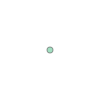

In [496]:
point = Point(-122.259932, 37.812757)
highways.iloc[1, 2].distance(point)
point

In [328]:
def distance_to_highway(x, highways):
    dists = []
    for i in highways.geometry:
        dists.append(i.distance(x))
    return(np.min(dists))

In [329]:
distance_to_highway(point, highways)

0.00849542794106125

In [279]:
#how to find a specific roadway....
maritime = single_roads[single_roads['name'].str.contains("Maritime", na=False)]

In [280]:
maritime

,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,tunnel,u,v
176,NaN,NaN,"LINESTRING (-122.3008409 37.822317, -122.30065...",secondary,NaN,0,4,52.181,NaN,Maritime Street,False,6326932,NaN,NaN,99582488,99591354
177,NaN,NaN,"LINESTRING (-122.3008409 37.822317, -122.30129...",secondary,NaN,0,"[5, 4]",188.703,45 mph,Maritime Street,False,"[393658320, 518498961, 393658318]",NaN,NaN,99582488,5057677679
1637,NaN,NaN,"LINESTRING (-122.3022387 37.8210304, -122.3023...",secondary,NaN,0,"[3, 4]",218.922,45 mph,Maritime Street,False,"[518498958, 280308285, 518498957, 518498959]",NaN,NaN,5057677679,274405751
1638,NaN,NaN,"LINESTRING (-122.3022387 37.8210304, -122.3016...",secondary,NaN,0,"[5, 4]",188.703,45 mph,Maritime Street,False,"[393658320, 518498961, 393658318]",NaN,NaN,5057677679,99582488
4508,NaN,NaN,"LINESTRING (-122.3038338 37.8195176, -122.3034...",secondary,NaN,0,"[3, 4]",218.922,45 mph,Maritime Street,False,"[280308285, 518498957, 518498958, 518498959]",NaN,NaN,274405751,5057677679
4509,NaN,NaN,"LINESTRING (-122.3038338 37.8195176, -122.3044...",secondary,NaN,0,"[5, 4]",163.632,45 mph,Maritime Street,False,"[518498960, 393658323]",NaN,NaN,274405751,274405883
4699,NaN,NaN,"LINESTRING (-122.3050276 37.8183879, -122.3054...",secondary,NaN,0,"[5, 4]",443.171,45 mph,Maritime Street,False,"[393658322, 393658323, 393658316, 393658317]",NaN,NaN,274405883,53016907
4700,NaN,NaN,"LINESTRING (-122.3050276 37.8183879, -122.3044...",secondary,NaN,0,"[5, 4]",163.632,45 mph,Maritime Street,False,"[518498960, 393658323]",NaN,NaN,274405883,274405751
4721,NaN,NaN,"LINESTRING (-122.3121042 37.8085402, -122.3121...",tertiary,NaN,0,NaN,13.448,35 mph,Maritime Street,False,52646213,NaN,NaN,420944418,53131088
4723,NaN,NaN,"LINESTRING (-122.3121042 37.8085402, -122.3121...",tertiary,NaN,0,NaN,1214.580,35 mph,Maritime Street,False,"[417934843, 52646213]",NaN,NaN,420944418,274407287


In [497]:
Point?

In [78]:
ox.plot_graph(ox.graph_from_place('West Oakland, Oakland, California'))

Exception: There are no nodes within the requested geometry

In [8]:
def create_latlon_grid(lat, long, step = 0.0003, resolution=0.004):
    """close to 30m spacing in lat and long"""
    north = lat + resolution
    south = lat - resolution
    east = long + resolution
    west = long - resolution
    
    lat_steps = int((north - south)/step)
    long_steps = int((east - west)/step)
    
    lats = np.linspace(south, north, num=lat_steps)
    longs = np.linspace(east, west, num=long_steps)
    
    LatLong_list = list(itertools.product(longs, lats))
    geometry = [Point(xy) for xy in zip(LatLong_list)] #shapely point
    
    gdf = gpd.GeoDataFrame(LatLong_list, geometry=geometry, columns = ['Long', 'Lat'])
    
    return(gdf)

out = create_latlon_grid(-112.3, 30)

In [10]:
layout = dict(
    autosize=True,
    height=670,
    font=dict(color='#fffcfc'),
    titlefont=dict(color='#fffcfc', size='14'),
    margin=dict(
        l=25,
        r=25,
        b=25,
        t=45
    ),
    hovermode="closest",
    plot_bgcolor="#191A1A",
    paper_bgcolor="#020202",
    legend=dict(font=dict(size=10), orientation='h'),
    title='Hover point in the map to observe measured NOx levels',
    mapbox=dict(
        accesstoken='hollow',
        style="dark",
        center=dict(
            lon=-122.271111,
            lat=37.804363
        ),
        zoom=12,
    )
)

In [15]:
layout['mapbox']['center']['lon']

-122.271111

In [16]:
layout['mapbox']['center']['lon'] = 3

In [17]:
layout['mapbox']['center']['lon']

3

In [18]:
layout['zoom']

KeyError: 'zoom'